                                               [SL]ACHATHON
                                        Optimize Supply Chain Inventory

Effectively manage and optimize inventory by capturing variables such as lead times, manufac-
turing frequency, batch size, and ordering policies from across the supply chain. Using algo-
rithms, exception-based forecasts, and real-time downstream demand signals, suggest and
adjust inventories to optimal levels. Maintain the right amount of inventory required to meet
demand, keep logistics costs low, and avoid common inventory issues such as stockouts, over-
stocking, and backorders.                                           

Librarys for necessary tasks

In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [9]:
import plotly.express as ps

In [10]:
import statistics as stc

In [11]:
from datetime import datetime

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

Read data using pandas

In [13]:
df = pd.read_csv('supply chain.csv')

In [14]:
df.head(5)

RegionName               CountryName  State       City PostalCode  \
0  South America  United States of America  Texas  Southlake      26192   
1  South America  United States of America  Texas  Southlake      26192   
2  South America  United States of America  Texas  Southlake      26192   
3  South America  United States of America  Texas  Southlake      26192   
4  South America  United States of America  Texas  Southlake      26192   

      WarehouseAddress    WarehouseName    EmployeeName  \
0  2014 Jabberwocky Rd  Southlake Texas    Summer Payne   
1  2014 Jabberwocky Rd  Southlake Texas   Rose Stephens   
2  2014 Jabberwocky Rd  Southlake Texas  Annabelle Dunn   
3  2014 Jabberwocky Rd  Southlake Texas    Tommy Bailey   
4  2014 Jabberwocky Rd  Southlake Texas    Blake Cooper   

                EmployeeEmail  EmployeePhone  ...    CustomerName  \
0    summer.payne@example.com     5151238181  ...      Flor Stone   
1   rose.stephens@example.com     5151238080  ...  Lavera Emerson   
2  annabelle.dunn@example.com     5151234444  ...       Fern Head   
3    tommy.bailey@example.com     5151234567  ...     Shyla Ortiz   
4    blake.cooper@example.com     5151234569  ...       Jeni Levy   

                    CustomerAddress CustomerCreditLimit  \
0                  2904 S Salina St                5000   
1  5344 Haverford Ave, Philadelphia                5000   
2      1795 Wu Meng, Muang Chonburi                1200   
3           Walpurgisstr 69, Munich                2400   
4             Via Frenzy 6903, Roma                1200   

                          CustomerEmail CustomerPhone    Status  OrderDate  \
0               flor.stone@raytheon.com   13171234104   Shipped  17-Nov-16   
1  lavera.emerson@plainsallamerican.com   13171234111   Shipped  20-Feb-17   
2                 fern.head@usfoods.com   18121234115  Canceled  03-Jan-17   
3                shyla.ortiz@abbvie.com   13171234126   Pending  15-Oct-17   
4                 jeni.levy@centene.com   18121214129   Shipped  09-Apr-17   

   OrderItemQuantity PerUnitPrice TotalItemQuantity  
0                132       469.99               122  
1                124       519.99               123  
2                 92       800.74               123  
3                128       849.99               124  
4                106       109.99               125  

[5 rows x 28 columns]

In [15]:
df.tail(5)

RegionName CountryName        State    City PostalCode  \
395       Asia       India  Maharashtra  Bombay     490231   
396       Asia       India  Maharashtra  Bombay     490231   
397       Asia       India  Maharashtra  Bombay     490231   
398       Asia       India  Maharashtra  Bombay     490231   
399       Asia       India  Maharashtra  Bombay     490231   

       WarehouseAddress WarehouseName     EmployeeName  \
395  1298 Vileparle (E)        Bombay   Veera Abdellah   
396  1298 Vileparle (E)        Bombay     Vega Vincent   
397  1298 Vileparle (E)        Bombay  Villanueva Noah   
398  1298 Vileparle (E)        Bombay     Zima Colleen   
399  1298 Vileparle (E)        Bombay     Volk Colleen   

                EmployeeEmail  EmployeePhone  ...     CustomerName  \
395   VeeraAbdellah@gmail.com     8788092231  ...     Vega Vincent   
396     VegaVincent@gmail.com     6700989921  ...  Villanueva Noah   
397  VillanuevaNoah@gmail.com     7890991231  ...   Voldemort Lord   
398     ZimaColleen@gmail.com     8690991436  ...   Lucy Cechtelar   
399      VolkCollen@gmail.com     9426826971  ...        John Snow   

          CustomerAddress CustomerCreditLimit             CustomerEmail  \
395        4284 Dorigo Ln                4900     VegaVincent@gmail.com   
396        6794 Lake Dr E                5000  VillanuevaNoah@gmail.com   
397  31 Douglas Blvd #950                4000   VoldemortLord@gmail.com   
398           44 W 4th St                3000   LucyCechtelar@gmail.com   
399       11279 Loytan St                2000        JohnSnow@gmail.com   

    CustomerPhone    Status  OrderDate  OrderItemQuantity PerUnitPrice  \
395     787879874   Shipped  27-Sep-17                 32       725.99   
396     785811219   Pending  16-Aug-16                 66       798.26   
397     789243757  Canceled  27-May-16                 82       849.99   
398     964940981   Shipped  27-May-17                157       821.99   
399     567897474  Canceled  27-May-17                 32       579.59   

    TotalItemQuantity  
395               107  
396               118  
397               118  
398                95  
399                92  

[5 rows x 28 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionName           400 non-null    object 
 1   CountryName          400 non-null    object 
 2   State                400 non-null    object 
 3   City                 400 non-null    object 
 4   PostalCode           400 non-null    object 
 5   WarehouseAddress     400 non-null    object 
 6   WarehouseName        400 non-null    object 
 7   EmployeeName         400 non-null    object 
 8   EmployeeEmail        400 non-null    object 
 9   EmployeePhone        400 non-null    int64  
 10  EmployeeHireDate     400 non-null    object 
 11  EmployeeJobTitle     400 non-null    object 
 12  CategoryName         400 non-null    object 
 13  ProductName          400 non-null    object 
 14  ProductDescription   400 non-null    object 
 15  ProductStandardCost  400 non-null    flo

In [17]:
df.describe()

EmployeePhone  ProductStandardCost       Profit  ProductListPrice  \
count   4.000000e+02           400.000000   400.000000        400.000000   
mean    1.300551e+12          1812.654525   189.743700       2002.398800   
std     3.546655e+12          4297.988742   254.318871       4432.591249   
min     1.856490e+07            12.630000     0.000000         15.550000   
25%     9.716165e+08           414.160000    59.972500        502.982500   
50%     1.168870e+10           698.320000   134.200000        849.990000   
75%     2.651186e+10          1671.950000   229.520000       1999.890000   
max     1.144164e+13         75410.000000  2770.000000      78180.000000   

       CustomerCreditLimit  CustomerPhone  OrderItemQuantity  PerUnitPrice  \
count           400.000000   4.000000e+02         400.000000    400.000000   
mean           2033.617500   6.422348e+10          89.240000    839.253100   
std            1534.488065   1.871854e+11          34.064253    706.449917   
min             100.000000   4.538500e+04          32.000000     16.990000   
25%             700.000000   3.545837e+09          61.000000    352.982500   
50%            1500.000000   9.800588e+09          85.500000    686.990000   
75%            3500.000000   1.812122e+10         118.000000   1055.990000   
max            5000.000000   9.138593e+11         157.000000   4139.000000   

       TotalItemQuantity  
count         400.000000  
mean          123.695000  
std            67.438876  
min             0.000000  
25%            92.750000  
50%           123.000000  
75%           178.000000  
max           353.000000

In [18]:
df.duplicated().sum()

0

This data does not have any duplicates

In [19]:
df.isnull().sum()

RegionName             0
CountryName            0
State                  0
City                   0
PostalCode             0
WarehouseAddress       0
WarehouseName          0
EmployeeName           0
EmployeeEmail          0
EmployeePhone          0
EmployeeHireDate       0
EmployeeJobTitle       0
CategoryName           0
ProductName            0
ProductDescription     0
ProductStandardCost    0
Profit                 0
ProductListPrice       0
CustomerName           0
CustomerAddress        0
CustomerCreditLimit    0
CustomerEmail          0
CustomerPhone          0
Status                 0
OrderDate              0
OrderItemQuantity      0
PerUnitPrice           0
TotalItemQuantity      0
dtype: int64

No null values found

In [20]:
df['WarehouseName'].unique()

array(['Southlake Texas', 'San Francisco', 'New Jersy',
       'Seattle Washington', 'Toronto', 'Sydney', 'Mexico City',
       'Beijing', 'Bombay'], dtype=object)

In [23]:
df['CountryName'].unique()

array(['United States of America', 'Canada', 'Australia', 'Mexico',
       'China', 'India'], dtype=object)

In [24]:
df['RegionName'].unique()

array(['South America', 'North  America', 'North America', 'Australia',
       'Asia'], dtype=object)

Regionname,CountryName these columns are almost same.The only difference is factor levels.


Outlier deteaction 

In [25]:
df.Profit.describe()

count     400.000000
mean      189.743700
std       254.318871
min         0.000000
25%        59.972500
50%       134.200000
75%       229.520000
max      2770.000000
Name: Profit, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Profit'>

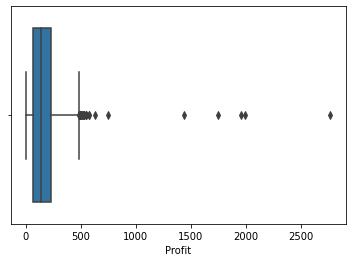

In [26]:
sns.boxplot(df['Profit'])

In [27]:
mean_profit = stc.mean(df['Profit'])
print(mean_profit)

189.7437


In [28]:
std_profit = stc.stdev(df['Profit'])
print(std_profit)

254.318870645152


In [31]:
profit_upper  = mean_profit+3*std_profit
print(profit_upper)

952.700311935456


In [32]:
len(df[df.Profit>profit_upper])

5

The count of outliers are very less

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ProductStandardCost'>

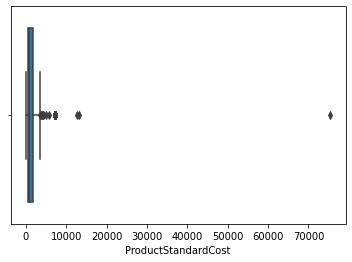

In [33]:
sns.boxplot(df['ProductStandardCost'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ProductListPrice'>

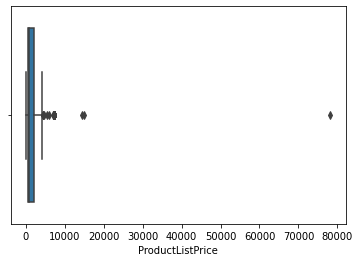

In [35]:
sns.boxplot(df['ProductListPrice'])

Outliers considerably very low

Here tring to find the high profitable warehouse and the country

In [36]:
country_pro = df.groupby(['CountryName','WarehouseName']).agg(Sum=('Profit','sum'))
country_pro.sort_values(by='Sum',ascending=False)

Sum
CountryName              WarehouseName               
United States of America Southlake Texas     14181.44
                         San Francisco       12539.70
Mexico                   Mexico City         11498.05
China                    Beijing             10348.09
United States of America New Jersy            8524.89
India                    Bombay               7138.22
United States of America Seattle Washington   6406.94
Canada                   Toronto              3817.83
Australia                Sydney               1442.32

<AxesSubplot:xlabel='country', ylabel='Sum of profit'>

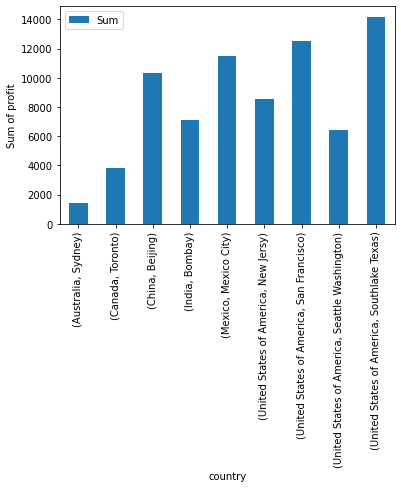

In [37]:
country_pro.plot(kind = 'bar',xlabel='country',ylabel='Sum of profit')

Most profitable ware houses are united states of america(Southlake Texas,San Francisco),mexico(Mexico City),China(Beijing)...


Find the Warehouse which received more orders 

<BarContainer object of 400 artists>

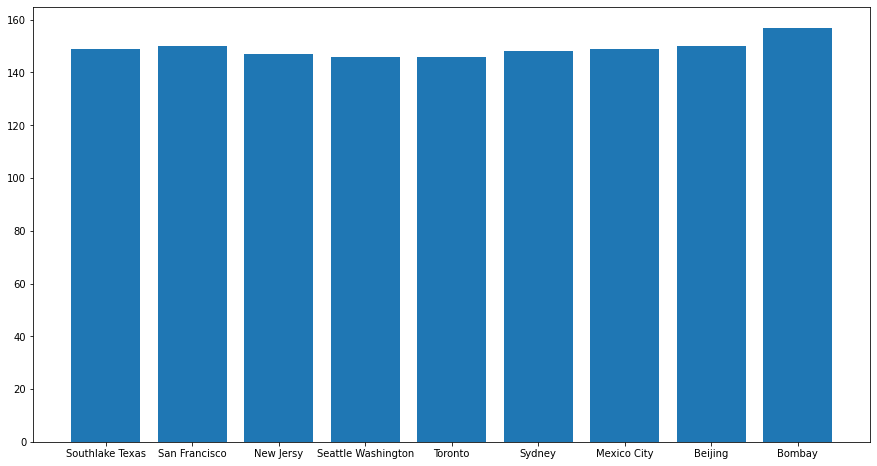

In [38]:
x = df['WarehouseName']
y = df['OrderItemQuantity']
plt.figure(figsize = (15,8))
plt.bar(x,y)

Ware houses are having almost equal number of orders

Depict Category wise orders 

In [39]:
df['CategoryName'].unique()

array(['CPU', 'Video Card', 'Storage', 'Mother Board', 'RAM'],
      dtype=object)

In [40]:
category=df.groupby(['CategoryName']).agg(Sum=('OrderItemQuantity','sum'))

category.sort_values(by='Sum',ascending=False)

Sum
CategoryName       
Storage       11116
CPU            8127
Mother Board   6931
Video Card     6311
RAM            3211

<AxesSubplot:xlabel='Category name', ylabel='Sum of ordered item'>

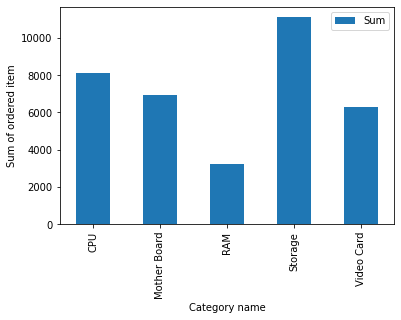

In [41]:
category.plot(kind='bar',xlabel='Category name',ylabel='Sum of ordered item')

Storage has in the top position with high variance.Cpu and mother board are having  the next two positions.

Find out the percentage of cancelled,pending and shipped orders

In [42]:
df['Status'].unique()

array(['Shipped', 'Canceled', 'Pending'], dtype=object)

In [43]:
status = df['Status'].value_counts()
print(status)

Shipped     183
Canceled    111
Pending     106
Name: Status, dtype: int64


<AxesSubplot:xlabel='Shippment status', ylabel='Total count'>

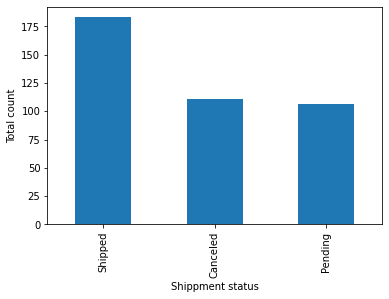

In [44]:
status.plot(kind='bar',xlabel =  'Shippment status',ylabel = 'Total count')

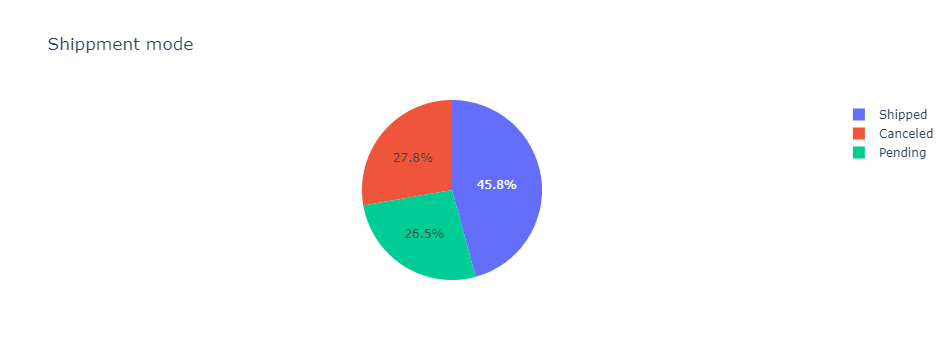

In [45]:
pie = ps.pie(df,values = status,names = status.index,title = 'Shippment mode')

pie.show()

canceled orders and pending orders are almost equal.This will effect the profit as negatively. shipped orders are only 45% of whole data.

Have a look at couuntry and ware house wise status.

In [46]:
order_status = df.groupby(['CountryName','WarehouseName','Status']).agg(count=('CountryName','count'))

order_status.sort_values(by='CountryName',ascending = False)

count
CountryName              WarehouseName      Status         
United States of America Southlake Texas    Shipped      26
                                            Pending       9
                                            Canceled      9
                         Seattle Washington Shipped      17
                                            Pending      13
                                            Canceled     15
                         San Francisco      Shipped      22
                                            Pending       9
                                            Canceled     13
                         New Jersy          Shipped      25
                                            Pending      13
                                            Canceled      7
Mexico                   Mexico City        Shipped      18
                                            Pending      13
                                            Canceled     14
India                    Bombay             Shipped      19
                                            Pending      10
                                            Canceled     14
China                    Beijing            Shipped      18
                                            Pending      13
                                            Canceled     14
Canada                   Toronto            Shipped      20
                                            Pending      12
                                            Canceled     12
Australia                Sydney             Pending      14
                                            Shipped      18
                                            Canceled     13

<AxesSubplot:xlabel='Warehouse', ylabel='Count'>

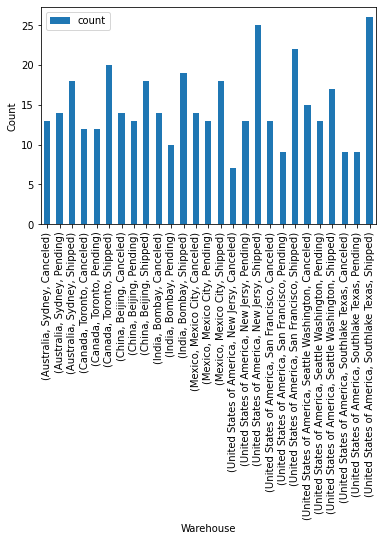

In [47]:
order_status.plot(kind='bar',xlabel = 'Warehouse',ylabel = 'Count')

In [48]:
canceled_order = df[df['Status']=='Canceled']['WarehouseName'].value_counts()

print(canceled_order)

Seattle Washington    15
Bombay                14
Mexico City           14
Beijing               14
Sydney                13
San Francisco         13
Toronto               12
Southlake Texas        9
New Jersy              7
Name: WarehouseName, dtype: int64


In [49]:
pending_orders = df[df['Status']=='Pending']['WarehouseName'].value_counts()

print(pending_orders)

Sydney                14
Seattle Washington    13
New Jersy             13
Mexico City           13
Beijing               13
Toronto               12
Bombay                10
Southlake Texas        9
San Francisco          9
Name: WarehouseName, dtype: int64


In [50]:
shipped_orders = df[df['Status']=='Shipped']['WarehouseName'].value_counts()

print(shipped_orders)

Southlake Texas       26
New Jersy             25
San Francisco         22
Toronto               20
Bombay                19
Sydney                18
Mexico City           18
Beijing               18
Seattle Washington    17
Name: WarehouseName, dtype: int64


Seattle washingtone,Mexico city,Beijing these warehouse  performace are very poor.Need to improve.

Category wise status

In [51]:
status_cat = df.groupby(['CategoryName','Status']).agg(Count=('CategoryName','count'))

status_cat.sort_values(by='CategoryName',ascending = False)

Count
CategoryName Status         
Video Card   Canceled     17
             Pending      20
             Shipped      33
Storage      Canceled     37
             Pending      37
             Shipped      53
RAM          Canceled     10
             Pending      11
             Shipped      13
Mother Board Canceled     23
             Pending      21
             Shipped      35
CPU          Canceled     24
             Pending      17
             Shipped      49

<AxesSubplot:xlabel='CategoryName,Status'>

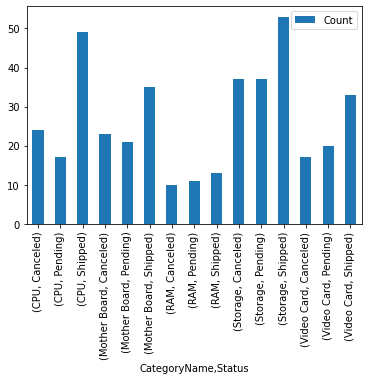

In [52]:
status_cat.plot(kind = 'bar')

It gives a wired view of status.category Ram,storage are affected more that others.

Plot the order frequency.

In [53]:
df['OrderDate'].value_counts()

10-Feb-17    21
17-Feb-16    14
21-Feb-17    14
02-Oct-16    12
29-Sep-16    12
             ..
15-Feb-17     2
14-Dec-16     2
26-Apr-15     2
27-Oct-17     2
26-Apr-17     2
Name: OrderDate, Length: 75, dtype: int64

In [54]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

<AxesSubplot:xlabel='OrderDate', ylabel='Profit'>

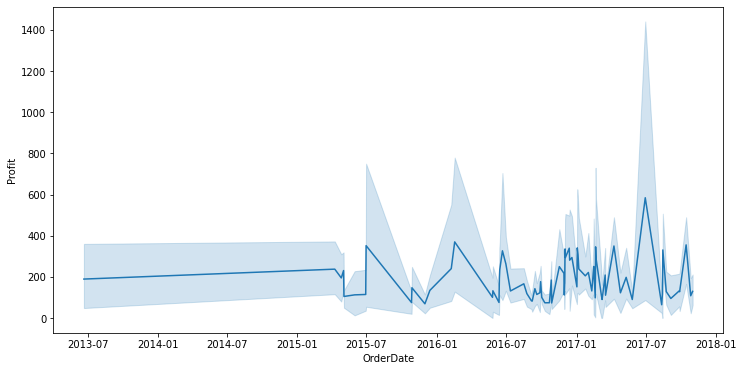

In [55]:
plt.subplots(figsize=(12,6))

sns.lineplot(x=df['OrderDate'],y=df['Profit'])


2017 second quarter has larger variaton than the other parts and  the data does not diployed in a unique pattern.

<AxesSubplot:xlabel='OrderDate', ylabel='OrderItemQuantity'>

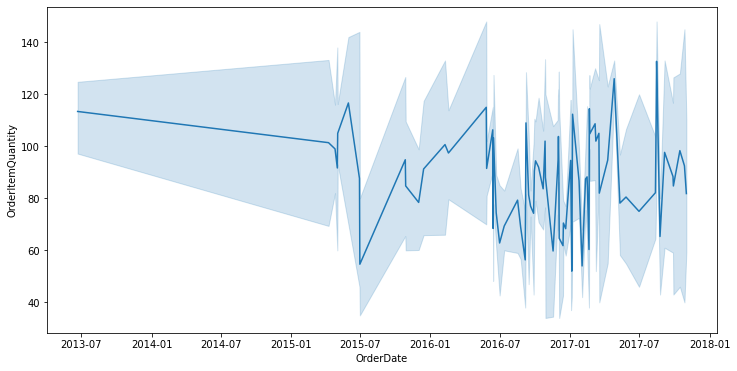

In [56]:
plt.subplots(figsize=(12,6))

sns.lineplot(data=df,x='OrderDate',y='OrderItemQuantity')


order quantity is decreasing year by year.oderitem quantity showing some variation on 2016 to 2018. 

Is there any stock issue.find out the stock check.

In [57]:
order_quantity = df['OrderItemQuantity'].sum()

print(order_quantity)

35696


In [58]:
total_quantity = df['TotalItemQuantity'].sum()

print(total_quantity)

49478


In [59]:
df1 = pd.DataFrame(df,columns=['WarehouseName','CategoryName','OrderItemQuantity','TotalItemQuantity'])
 
df1['StockItemDiffer'] = df1['TotalItemQuantity'] - df1['OrderItemQuantity']

df1

WarehouseName CategoryName  OrderItemQuantity  TotalItemQuantity  \
0    Southlake Texas          CPU                132                122   
1    Southlake Texas          CPU                124                123   
2    Southlake Texas          CPU                 92                123   
3    Southlake Texas          CPU                128                124   
4    Southlake Texas          CPU                106                125   
..               ...          ...                ...                ...   
395           Bombay   Video Card                 32                107   
396           Bombay   Video Card                 66                118   
397           Bombay   Video Card                 82                118   
398           Bombay   Video Card                157                 95   
399           Bombay   Video Card                 32                 92   

     StockItemDiffer  
0                -10  
1                 -1  
2                 31  
3                 -4  
4                 19  
..               ...  
395               75  
396               52  
397               36  
398              -62  
399               60  

[400 rows x 5 columns]

Over- stocking

In [62]:
df1.sort_values(by ='StockItemDiffer', ascending = False)

WarehouseName  CategoryName  OrderItemQuantity  TotalItemQuantity  \
382         Bombay    Video Card                103                353   
384         Bombay    Video Card                 34                267   
383         Bombay    Video Card                 68                267   
366         Bombay  Mother Board                 37                227   
363         Bombay  Mother Board                 37                226   
..             ...           ...                ...                ...   
106      New Jersy    Video Card                137                  9   
110      New Jersy    Video Card                139                 11   
101      New Jersy    Video Card                145                  6   
100      New Jersy    Video Card                147                  6   
59   San Francisco           CPU                150                  3   

     StockItemDiffer  
382              250  
384              233  
383              199  
366              190  
363              189  
..               ...  
106             -128  
110             -128  
101             -139  
100             -141  
59              -147  

[400 rows x 5 columns]

Here have a look at the over stock.video card and mother board are less selling or over stock either of one.bombay ware houe has huge amout of stock.

Stockouts issue

In [64]:
df1.sort_values(by = 'StockItemDiffer',ascending = True )

WarehouseName  CategoryName  OrderItemQuantity  TotalItemQuantity  \
59     San Francisco           CPU                150                  3   
100        New Jersy    Video Card                147                  6   
101        New Jersy    Video Card                145                  6   
110        New Jersy    Video Card                139                 11   
106        New Jersy    Video Card                137                  9   
..               ...           ...                ...                ...   
43   Southlake Texas           CPU                 79                268   
366           Bombay  Mother Board                 37                227   
383           Bombay    Video Card                 68                267   
384           Bombay    Video Card                 34                267   
382           Bombay    Video Card                103                353   

     StockItemDiffer  
59              -147  
100             -141  
101             -139  
110             -128  
106             -128  
..               ...  
43               189  
366              190  
383              199  
384              233  
382              250  

[400 rows x 5 columns]

San francisco and new jersy are having huge amout of unavailability of cpu,video card.

In [107]:
column_values = df1['StockItemDiffer']
for col_val in column_values:
    print('stock is not available',col_val<1)
        
            
        
    
   

stock is not available True
stock is not available True
stock is not available False
stock is not available True
stock is not available False
stock is not available True
stock is not available True
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available True
stock is not available False
stock is not available True
stock is not available True
stock is not available True
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available True
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available False
stock is not available True
stock is not available False
stock is not available False
stock is not available False
stock is not available Fa

<AxesSubplot:xlabel='CategoryName', ylabel='StockItemDiffer'>

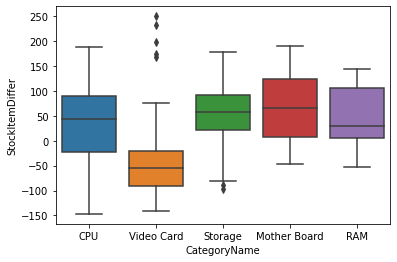

In [66]:
sns.boxplot(x = df1['CategoryName'],y = df1['StockItemDiffer'])

In the boxplot convey the shortage of video card. 

<AxesSubplot:xlabel='WarehouseName', ylabel='StockItemDiffer'>

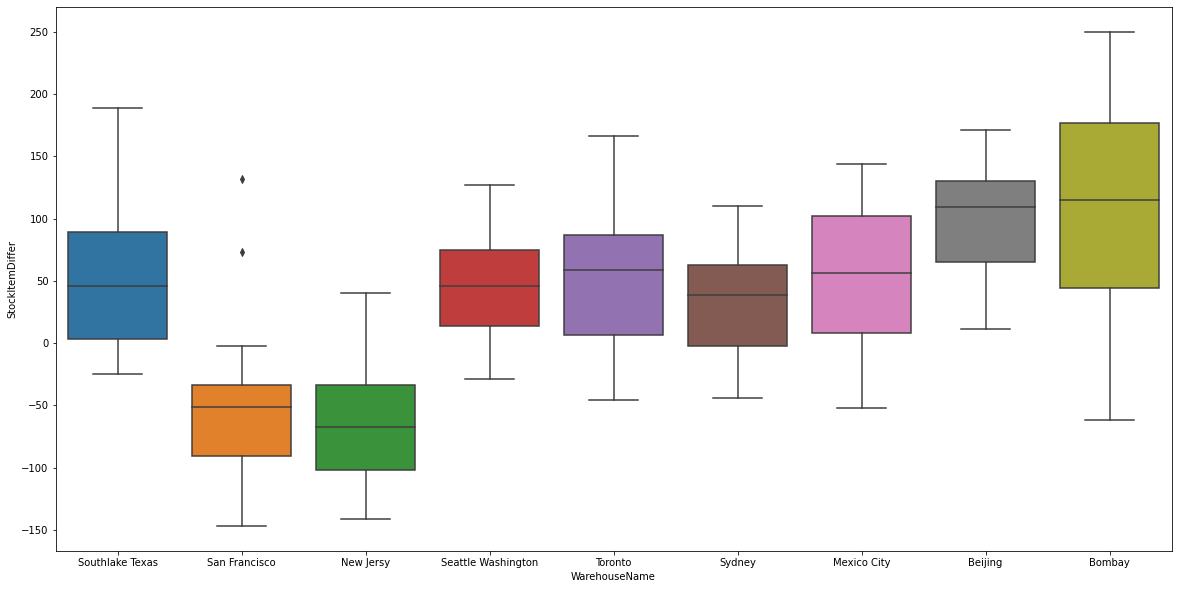

In [67]:
plt.figure(figsize=(20,10))

sns.boxplot(x = df1['WarehouseName'], y = df1['StockItemDiffer'])

San fransisco,new jersy unavailability and bombay's overstock dumbing.We have to focus on these place for the improvement.

Add a column to the data to show the orderpercost.

In [68]:
df3 = pd.DataFrame(df,columns=['WarehouseName','CategoryName','PerUnitPrice','OrderItemQuantity'])

df3['Orderpercost'] = df3['PerUnitPrice'] * df3['OrderItemQuantity']

df3.sort_values(by = 'Orderpercost' ,ascending =False)

WarehouseName  CategoryName  PerUnitPrice  OrderItemQuantity  \
358              Bombay       Storage       4139.00                145   
245              Sydney       Storage       4139.00                133   
303         Mexico City           RAM       2998.89                130   
272         Mexico City       Storage       2998.89                115   
266              Sydney       Storage       2377.09                138   
..                  ...           ...           ...                ...   
200             Toronto  Mother Board         41.99                 56   
298         Mexico City           RAM         41.99                 45   
163  Seattle Washington       Storage         16.99                 75   
129           New Jersy       Storage         16.99                 65   
335             Beijing           CPU         16.99                 43   

     Orderpercost  
358     600155.00  
245     550487.00  
303     389855.70  
272     344872.35  
266     328038.42  
..            ...  
200       2351.44  
298       1889.55  
163       1274.25  
129       1104.35  
335        730.57  

[400 rows x 5 columns]

Text(0.5, 1.0, 'total cost per order')

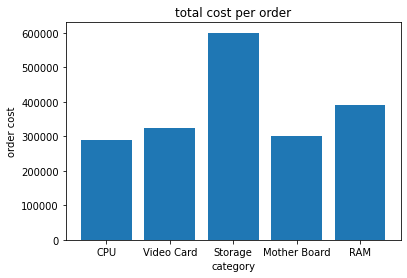

In [69]:
x = df3['CategoryName']

y = df3['Orderpercost']

plt.bar(x,y)

plt.ylabel('order cost')

plt.xlabel('category')

plt.title('total cost per order')

Text(0.5, 1.0, 'ware house per cost')

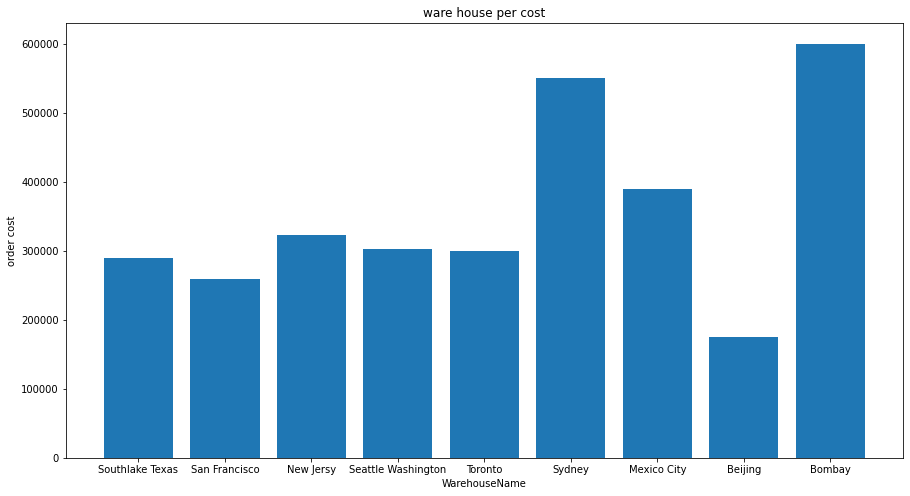

In [70]:
x = df3['WarehouseName']

y = df3['Orderpercost']

plt.figure(figsize=(15,8))

plt.bar(x,y)

plt.ylabel('order cost')

plt.xlabel('WarehouseName')

plt.title('ware house per cost')

In the criteria of Per order cost bombay,sydeny are in first row.storage and ram are the product.

Trying check the variable distribution for mechine learning.

<AxesSubplot:xlabel='ProductStandardCost', ylabel='Count'>

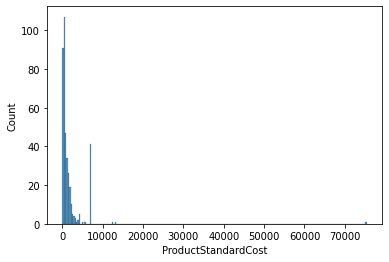

In [71]:
sns.histplot(df['ProductStandardCost'])

<AxesSubplot:xlabel='Profit', ylabel='Count'>

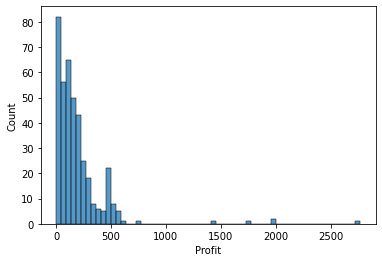

In [72]:
sns.histplot(df['Profit'])

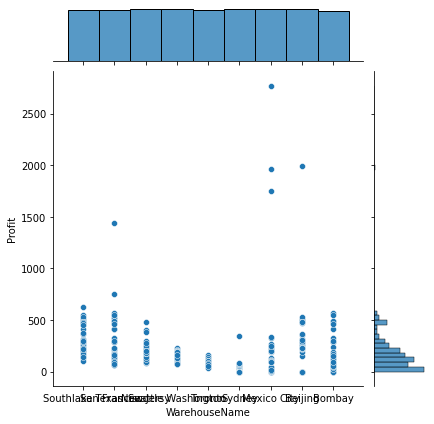

In [73]:
sns.jointplot(data=df,x='WarehouseName',y='Profit')

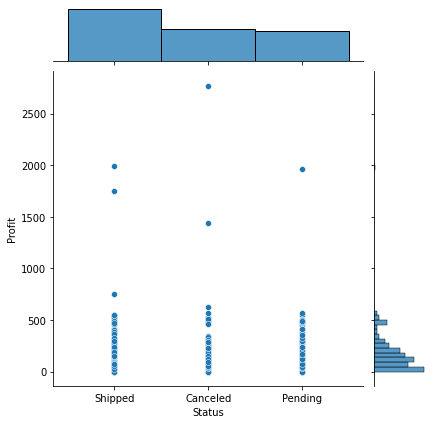

In [74]:
sns.jointplot(data=df,x='Status',y='Profit')

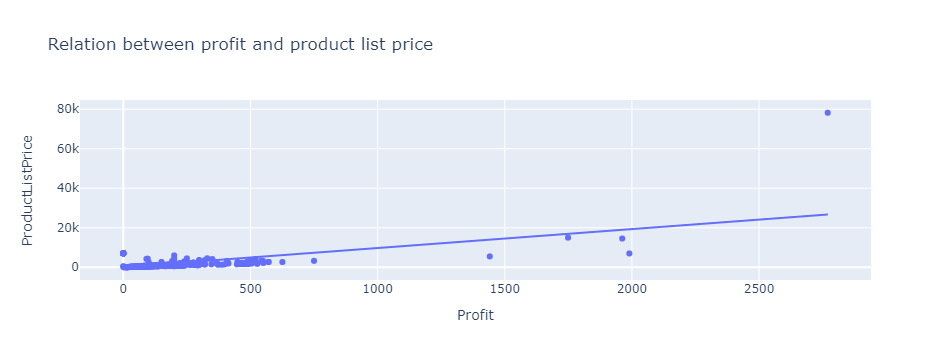

In [75]:
plot = ps.scatter(data_frame=df,x='Profit',y='ProductListPrice',trendline='ols',
                 title = 'Relation between profit and product list price')
plot.show()

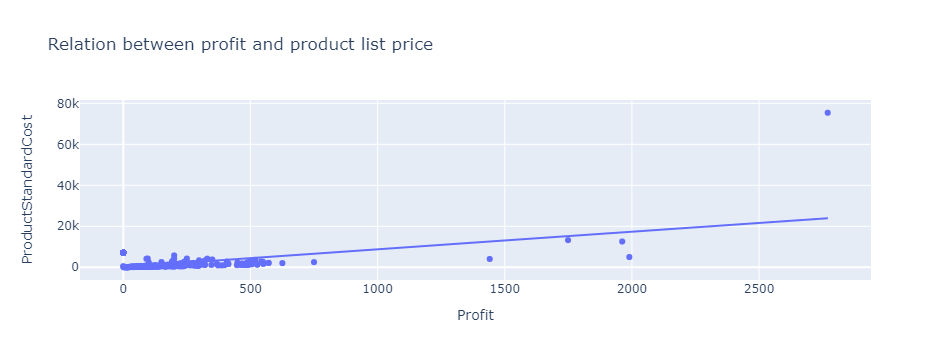

In [76]:
plot2 = ps.scatter(data_frame=df,x='Profit',y='ProductStandardCost',trendline='ols',
                 title = 'Relation between profit and product list price')
plot2.show()

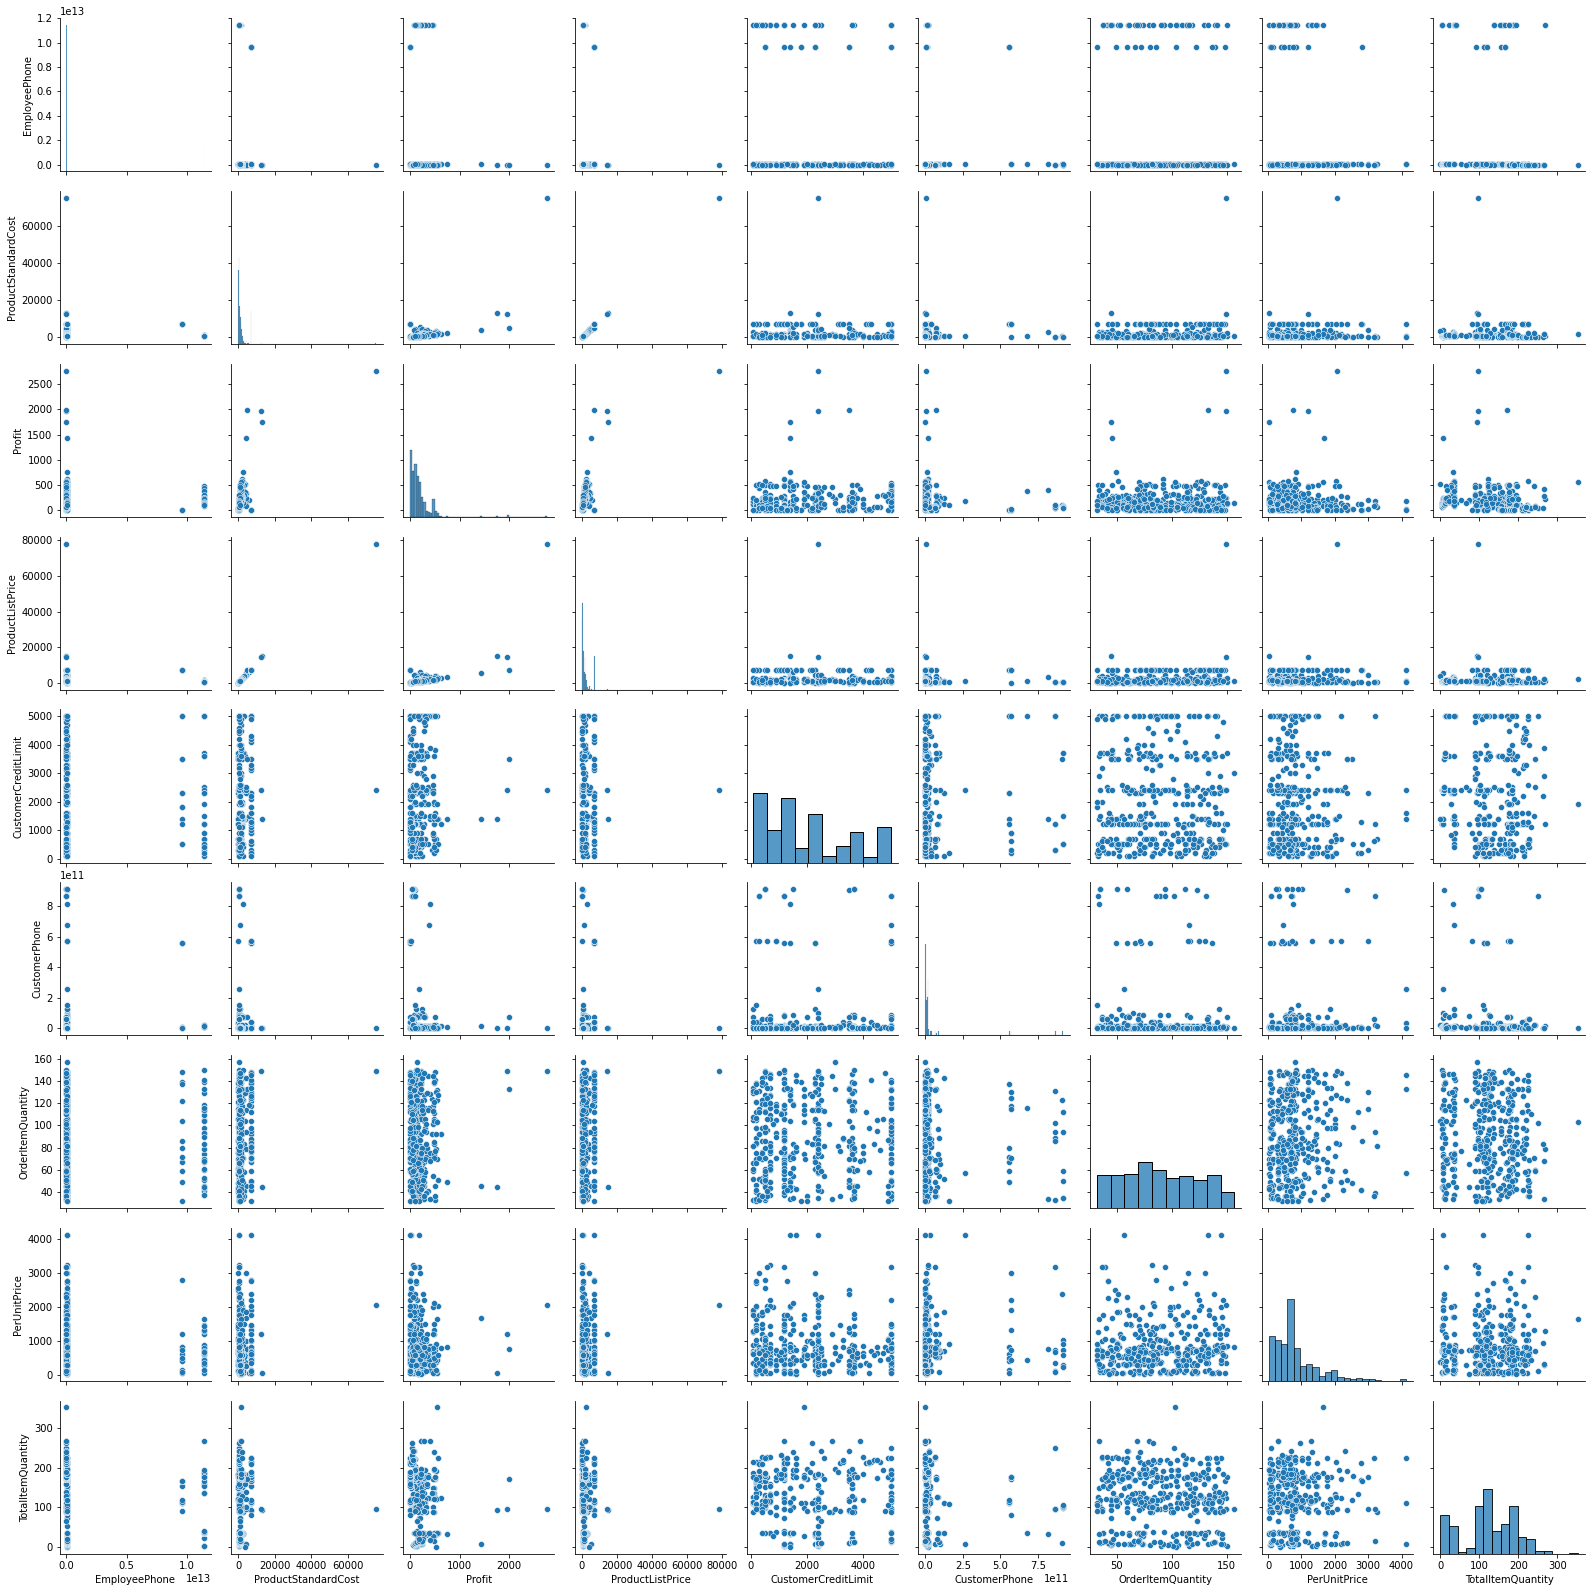

In [77]:
sns.pairplot(df)

In [78]:
cor = df.corr()
print(cor['Profit'].sort_values(ascending = False))

Profit                 1.000000
ProductListPrice       0.549919
ProductStandardCost    0.507970
OrderItemQuantity      0.075729
CustomerCreditLimit    0.052779
PerUnitPrice          -0.029464
EmployeePhone         -0.056564
CustomerPhone         -0.122882
TotalItemQuantity     -0.133516
Name: Profit, dtype: float64


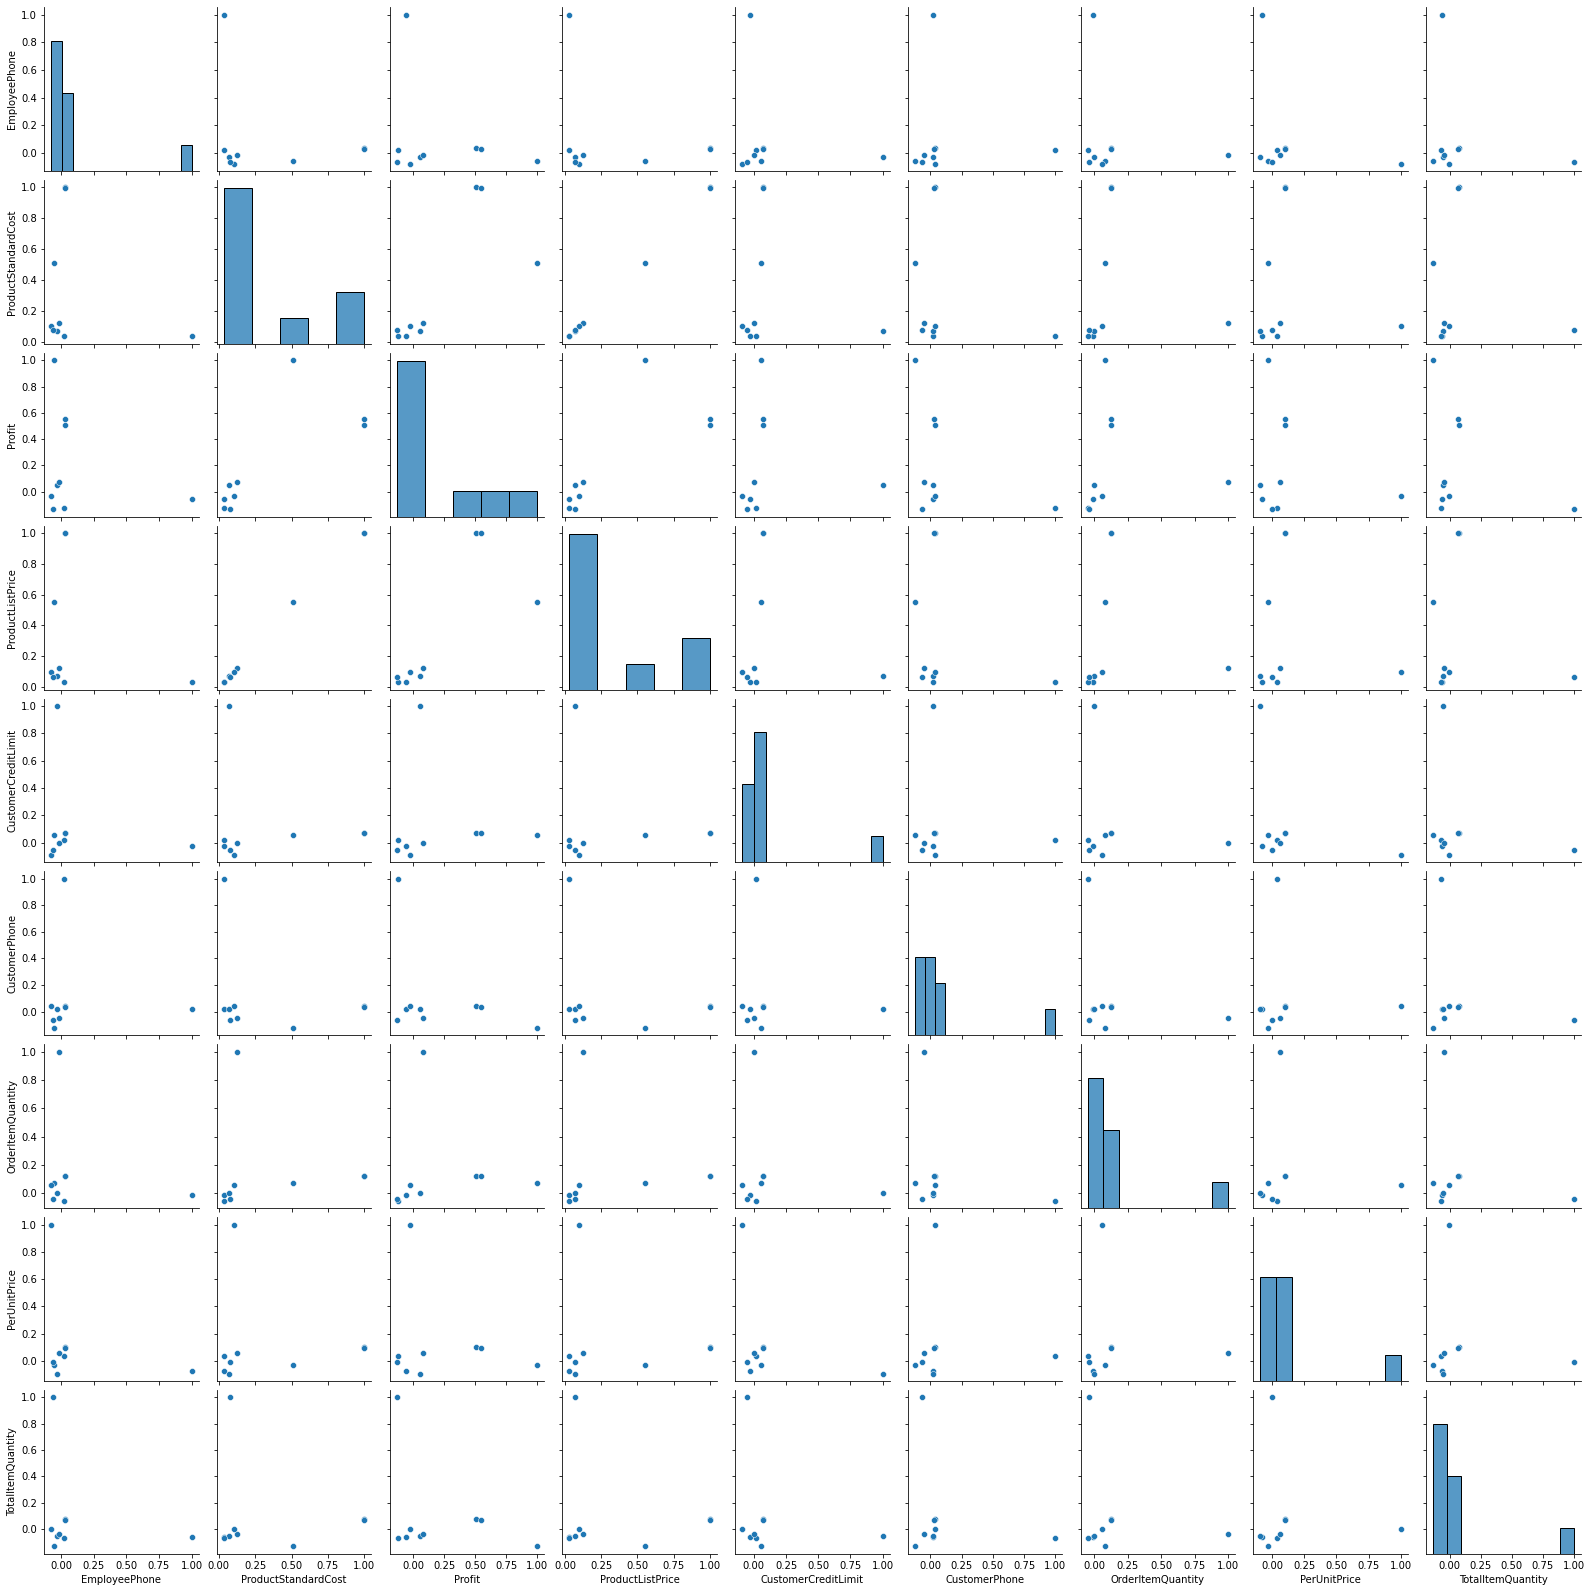

In [79]:
sns.pairplot(cor)

Text(0.5, 1.0, 'correlation heatmap')

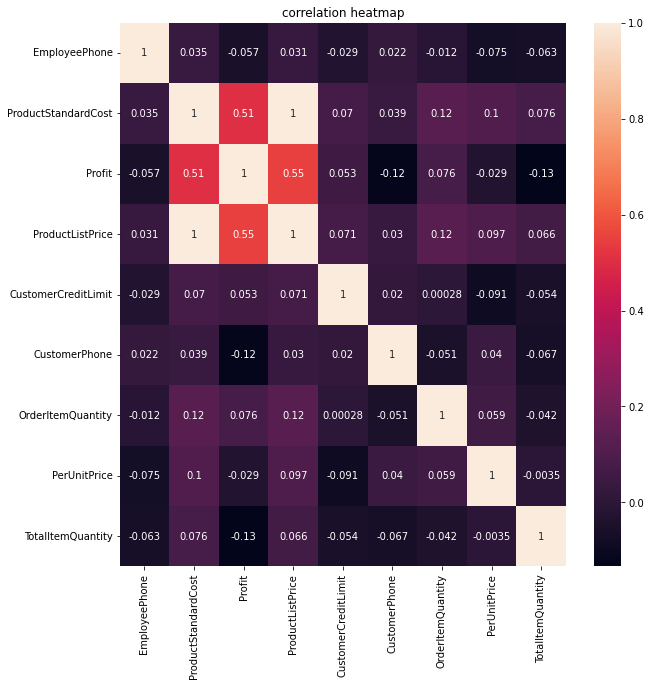

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.title('correlation heatmap')

ProductListPrice , ProductStandardCost , OrderItemQuantity , CustomerCreditLimit thes columns are significant to predict profit.    

Make a model with the variables

In [82]:
x = np.array(df[['ProductStandardCost','ProductListPrice','OrderItemQuantity','CustomerCreditLimit']])

y = np.array(df[['Profit']])


In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,
                                            random_state = 32)

print('x_train = ',x_train.shape)
print('x_test = ',x_test.shape)
print('y_train = ',y_train.shape)
print('y_test = ',y_test.shape)

x_train =  (280, 4)
x_test =  (120, 4)
y_train =  (280, 1)
y_test =  (120, 1)


In [84]:
model1 = LinearRegression()

model1.fit(x_train , y_train)

model1.score(x_test , y_test)


0.999999999970977

The model score is 0.999

find the variables which are influence the order.

In [85]:
df2 = df.copy()

In [86]:
df2.drop(columns = ['RegionName','CountryName','State','City','PostalCode','WarehouseAddress','EmployeeName',
        'EmployeeEmail','EmployeePhone','EmployeeHireDate','EmployeeJobTitle','ProductName','ProductDescription',
        'CustomerName','CustomerAddress','CustomerEmail','CustomerPhone'],inplace = True)

In [87]:
df2=pd.get_dummies(df2,columns=['WarehouseName','Status','CategoryName'])
df2.head()

ProductStandardCost  Profit  ProductListPrice  CustomerCreditLimit  \
0              2867.51  542.95           3410.46                 5000   
1              2326.27  448.71           2774.98                 5000   
2              2035.18  625.54           2660.72                 1200   
3              2144.40  410.59           2554.99                 2400   
4              2012.11  489.58           2501.69                 1200   

   OrderDate  OrderItemQuantity  PerUnitPrice  TotalItemQuantity  \
0 2016-11-17                132        469.99                122   
1 2017-02-20                124        519.99                123   
2 2017-01-03                 92        800.74                123   
3 2017-10-15                128        849.99                124   
4 2017-04-09                106        109.99                125   

   WarehouseName_Beijing  WarehouseName_Bombay  ...  WarehouseName_Sydney  \
0                      0                     0  ...                     0   
1                      0                     0  ...                     0   
2                      0                     0  ...                     0   
3                      0                     0  ...                     0   
4                      0                     0  ...                     0   

   WarehouseName_Toronto  Status_Canceled  Status_Pending  Status_Shipped  \
0                      0                0               0               1   
1                      0                0               0               1   
2                      0                1               0               0   
3                      0                0               1               0   
4                      0                0               0               1   

   CategoryName_CPU  CategoryName_Mother Board  CategoryName_RAM  \
0                 1                          0                 0   
1                 1                          0                 0   
2                 1                          0                 0   
3                 1                          0                 0   
4                 1                          0                 0   

   CategoryName_Storage  CategoryName_Video Card  
0                     0                        0  
1                     0                        0  
2                     0                        0  
3                     0                        0  
4                     0                        0  

[5 rows x 25 columns]

In [88]:
corr_value = df2.corr()
print(corr_value['OrderItemQuantity'].sort_values(ascending = False))

OrderItemQuantity                   1.000000
ProductListPrice                    0.124860
ProductStandardCost                 0.124290
WarehouseName_Mexico City           0.085161
Profit                              0.075729
WarehouseName_Southlake Texas       0.074786
Status_Shipped                      0.073171
PerUnitPrice                        0.058542
CategoryName_RAM                    0.046596
CategoryName_CPU                    0.016788
CategoryName_Video Card             0.012416
WarehouseName_Beijing               0.003302
CustomerCreditLimit                 0.000280
WarehouseName_New Jersy             0.000279
Status_Pending                     -0.007732
WarehouseName_Sydney               -0.012279
WarehouseName_Toronto              -0.017041
CategoryName_Mother Board          -0.021957
WarehouseName_Bombay               -0.030442
CategoryName_Storage               -0.034331
WarehouseName_San Francisco        -0.039587
TotalItemQuantity                  -0.042426
WarehouseN

These are the variables correlated each other.ProductListPrice,ProductStandardCost,WarehouseName_Mexico City....these are possitively correlated and These are the variables correlated each other.ProductListPrice,ProductStandardCost,WarehouseName_Mexico City....these are possitively correlated and otalItemQuantity,WarehouseName_Seattle Washington,Status_Canceled...negatively correlated.